# Laboratorio de regresión - 3

## Significancia de factores

|                |   |
:----------------|---|
| **Nombre**     |   |
| **Fecha**      |   |
| **Expediente** |   |

Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Advertising.csv")
df.head()

Saving Advertising.csv to Advertising.csv


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

In [5]:
import matplotlib.pyplot as plt


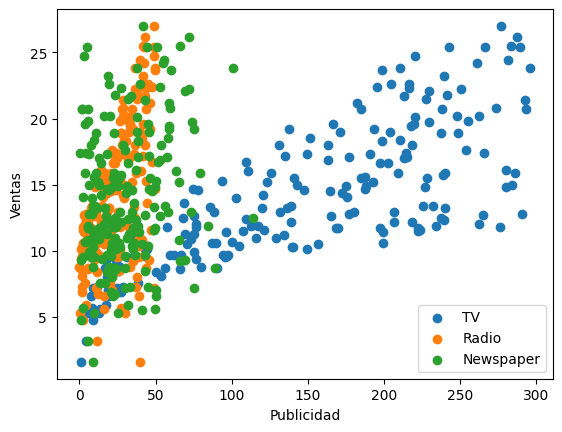

In [6]:
plt.scatter(df['TV'], df['sales'], label='TV')
plt.scatter(df['radio'], df['sales'], label='Radio')
plt.scatter(df['newspaper'], df['sales'], label='Newspaper')
plt.xlabel("Publicidad")
plt.ylabel("Ventas")
plt.legend()
plt.show()

**Respuesta**  Como se puede observar en la gráfica, al tener mas publicidad las ventas aumentan. tv (azul), conforme avanza a la derecha (publicidad) hay un aumento en las ventas. Radio (naranja), los puntos se ven más juntos, se ve que al tener un pequeño aumento en publicidad las ventas aumentan mucho más. Newspaper (verde), los puntos se ven un poco mas dispersos, pero puede que exista alguna relación entre publicidad y ventas.
Por lo tanto, si existe relación entre la publicidad y las ventas.

**Respuesta** El analisis de la relación entre el presupuesto de publicidad y las ventas es necesario para que la empresa vea en que medio es mejor invertir más. Es decir, para tomar mejores decisiones sobre como distribuir el presuspuesto.

**Respuesta** En el supuesto caso de que no hubiera alguna relación entre la publicidad y las ventas, nos indicaría que al momento de invertir en publicidad este no genere lgún beneficio en las ventas del prodcuto. Por lo tanto a empresa tendría que ver otras formas de marketing ya que este modelo no funcionaría.

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

**Respuesta** La relaciñon entre venta y publicidas no es la misma en todos los medios. Desde mi perspectiva la relación mas fuerte es entre tv y radio, mientras que en newspaper la relación esta un poco mas débil porque los puntos estan mas dispersos.

**Respuesta**  Si es importante conocer el impacto, ya que el saber el o los que tienen una relación más fuerte nos permite tomar una decisión más informada.

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Realiza una regresión lineal:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [9]:
x_tv = df['TV'].values.reshape(-1,1)

In [8]:
y = df['sales']

In [15]:
X_tv = x_tv
lr_tv = LinearRegression()
lr_tv.fit(X_tv,y)

LinearRegression()

In [18]:
b0_tv = lr_tv.intercept_
b0_tv

np.float64(7.032593549127695)

In [19]:
b1_tv =lr_tv.coef_
b1_tv

array([0.04753664])

ventas = 7.0325 + 0.04752(tv)

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

**Respuesta**
La población son los datos completos o totales de un evento a estudiar, mientras que la muestra es un pequeño conjunto de esos datos de la población.

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

**Respuesta**
Al hacer la regresión de la población no habrá algun error en el modelo, es decir se va a describir como tal el comportamiento del evento.

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-p}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [20]:
y_pred_tv = lr_tv.predict(X_tv)
y_pred_tv

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [22]:
n,p= X_tv.shape[0],X_tv.shape[1]
p+=1
xbar_tv = np.mean(x_tv)
aux_tv = np.sum((x_tv-xbar_tv)**2)

In [23]:
var_tv = np.sum(((y-lr_tv.predict(x_tv))**2)/(n-p))
SE_B1_tv = np.sqrt(var_tv/aux_tv)
SE_B1_tv

np.float64(0.0026906071877968707)

In [24]:
SE_B0_tv = np.sqrt(var_tv*(1/n + xbar_tv**2/aux_tv))
SE_B0_tv

np.float64(0.4578429402734785)

Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm 2\text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [25]:
B1_tv = SE_B1_tv*2
print(f"{b1_tv-B1_tv} < {b1_tv}, < {b1_tv+B1_tv}")

[0.04215543] < [0.04753664], < [0.05291785]


In [26]:
B0_tv = SE_B0_tv*2
print(f"{b0_tv-B0_tv} < {b0_tv}, < {b0_tv+B0_tv}")

6.116907668580738 < 7.032593549127695, < 7.948279429674652


Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

**Resupuesta** La hipotesis nula nos dice que no hay alguna relación entre las variables que se estan analizando, es decir que si una variable cambia la otra no tendría que cambiar porque no hay relación.
Por el otro lado, la hipostesis alternativa nos dice lo contrario, al haber una relación entre las variables, si una de ellas cambia la otra tmb va a cambiar.

**Respuesta** En este caso, nuestra variable x es tv y la varible "y" son las ventas. Entonces la hipotesis nula nos dice que si el presupuesto en tv aumenta, la variable "y" (ventas) no van a aumentar. La hipotesis alternativa, nos dice que si el presupuesto en tv aumenta, las ventas tmb van a aumentar.

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero.

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [27]:
t_b0_tv = (b0_tv-0)/SE_B0_tv
t_b0_tv

np.float64(15.360275174117547)

In [29]:
t_b1_tv = (b1_tv-0)/SE_B1_tv
t_b1_tv


array([17.6676256])

**notas**

Si t es grande -> b1^ mas alejado de 0, lo cual hay evidencia en contra de H0

Si t es pequeño -> b1^mas cercano a 0, no hay suficiente evidencia en contra de H0

La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-p))`

In [30]:
from scipy import stats

In [32]:
p_b0_tv = 2*(1-stats.t.cdf(np.abs(t_b0_tv),n-p))
p_b0_tv

np.float64(0.0)

In [33]:
p_b1_tv = 2*(1-stats.t.cdf(np.abs(t_b1_tv),n-p))
p_b1_tv

array([0.])

¿Se rechaza la hipótesis nula? ¿Qué significa?

**Respuesta** Al tener un p-value = 0, nos idica que la H0 se rechaza. Por lo tanto si hay una relación entre el presupuesto de tv y las ventas.

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

# ***Regresión Radio***

In [34]:
x_radio = df['radio'].values.reshape(-1,1)

In [35]:
X_radio = x_radio
lr_radio =LinearRegression()
lr_radio.fit(X_radio,y)

LinearRegression()

*Coeficientes estimados*

In [36]:
b0_radio = lr_radio.intercept_
b0_radio

np.float64(9.311638095158283)

In [37]:
b1_radio = lr_radio.coef_
b1_radio

array([0.20249578])

*Errores estándar de los coeficientes*

In [38]:
y_pred_radio=lr_radio.predict(X_radio)
y_pred_radio

array([16.96597871, 17.26972238, 18.60619455, 17.67471395, 11.49859256,
       19.2136819 , 15.95349979, 13.28055545,  9.73687924,  9.83812713,
       10.48611364, 14.1715369 , 16.41924009, 10.85060605, 15.97374937,
       18.97068696, 16.72298377, 17.33047112, 13.46280165, 14.15128732,
       14.9207713 , 10.34436659, 12.53132105, 12.73381683, 11.86308497,
       10.02037334, 15.24476455, 12.69331768, 14.79927383, 12.55157063,
       15.04226877, 12.83506473,  9.61538177, 13.36155376,  9.59513219,
       10.14187081, 18.18095341, 19.31492979, 14.71827551, 16.94572913,
       13.82729406, 16.07499726, 14.9207713 , 11.01260268, 14.51577973,
       13.86779322, 11.31634635, 17.71521311, 12.51107147, 11.68083876,
        9.93937502, 11.25559762, 17.75571226, 18.66694329, 15.14351666,
       19.31492979, 15.00176961, 13.19955714, 19.35542895, 15.28526371,
        9.71662966, 17.95820805, 12.45032274, 15.30551328, 17.97845762,
       11.19484888, 14.29303437, 12.24782695, 14.88027214, 18.20

In [39]:
n,p = X_radio.shape[0],X_radio.shape[1]
p+=1
xbar_radio = np.mean(x_radio)
aux_radio = np.sum((x_radio-xbar_radio)**2)

In [40]:
var_radio = np.sum(((y-lr_radio.predict(x_radio))**2)/(n-p))
SE_B1_radio = np.sqrt(var_radio/aux_radio)
SE_B1_radio

np.float64(0.020411306360090635)

In [41]:
SE_B0_radio = np.sqrt(var_radio*(1/n + xbar_radio**2/aux_radio))
SE_B0_radio

np.float64(0.5629004962718711)

*Intervalos de confianza*

In [42]:
B0_radio = SE_B0_radio*2
print(f"{b0_radio-B0_radio} < {b0_radio}, < {b0_radio+B0_radio}")

8.185837102614542 < 9.311638095158283, < 10.437439087702025


In [43]:
B1_radio = SE_B1_radio*2
print(f"{b1_radio-B1_radio} < {b1_radio}, < {b1_radio+B1_radio}")

[0.16167317] < [0.20249578], < [0.2433184]


*Estadísticos t*

In [44]:
t_b0_radio = (b0_radio-0)/SE_B0_radio
t_b0_radio

np.float64(16.542245311258217)

In [45]:
t_b1_radio = (b1_radio-0)/SE_B1_radio
t_b1_radio

array([9.92076547])

*p-values*

In [46]:
p_b0_radio = 2*(1-stats.t.cdf(np.abs(t_b0_radio),n-p))
p_b0_radio

np.float64(0.0)

In [47]:
p_b1_radio = 2*(1-stats.t.cdf(np.abs(t_b1_radio),n-p))
p_b1_radio

array([0.])

*Observaciones*

Se rechaza H0 ya que nuestro p-value = 0. Si hay relación entre el presupeusto de radio y las ventas.

# ***Regresión Newspaper***

In [49]:
x_new = df['newspaper'].values.reshape(-1,1)

In [50]:
X_new = x_new
lr_new = LinearRegression()
lr_new.fit(X_new,y)

LinearRegression()

Coeficientes estimados

In [51]:
b0_new = lr_new.intercept_
b0_new

np.float64(12.35140706927816)

In [52]:
b1_new = lr_new.coef_
b1_new

array([0.0546931])

*Errores estándar de los coeficientes*

In [53]:
y_pred_new =lr_new.predict(X_new)
y_pred_new

array([16.13616948, 14.81806581, 16.14163879, 15.55095333, 15.54548402,
       16.45338945, 13.63669488, 12.98584701, 12.40610017, 13.51090076,
       13.67498005, 12.57017946, 15.95568226, 12.74519738, 14.8672896 ,
       15.24467198, 18.5864203 , 15.40328196, 13.35229077, 13.39604525,
       15.27201853, 13.63669488, 15.06418475, 13.78436625, 13.35229077,
       13.41792249, 13.04054011, 13.60387902, 13.60387902, 14.58288549,
       14.71414892, 14.46256067, 13.99220002, 12.367815  , 12.756136  ,
       12.81629841, 12.62487256, 14.85088167, 14.27113483, 14.10158622,
       14.07970898, 14.46802998, 12.44985465, 13.79530487, 14.71961823,
       14.07423967, 14.30395068, 13.36322939, 15.08059268, 14.36411309,
       14.24378828, 12.54830222, 14.51725377, 15.56189195, 13.22102733,
       15.63299298, 14.61570135, 13.2593125 , 14.41333688, 12.86005289,
       13.52183938, 15.34311956, 13.84452866, 12.8108291 , 13.93203762,
       12.40063086, 12.47173189, 12.90927667, 12.95303115, 13.83

In [54]:
n,p = X_new.shape[0],X_new.shape[1]
p+=1
xbar_new = np.mean(x_new)
aux_new = np.sum((x_new-xbar_new)**2)

In [55]:
var_new = np.sum(((y-lr_new.predict(x_new))**2)/(n-p))
SE_B1_new = np.sqrt(var_new/aux_new)
SE_B1_new

np.float64(0.016575721876358165)

In [56]:
SE_B0_new = np.sqrt(var_new*(1/n + xbar_new**2/aux_new))
SE_B0_new

np.float64(0.6214201876094345)

*Intervalos de confianza*

In [57]:
B0_new = SE_B0_new*2
print(f"{b0_new-SE_B0_new} < {b0_new} < {b0_new+SE_B0_new}")

11.729986881668726 < 12.35140706927816 < 12.972827256887594


In [58]:
B1_new = SE_B1_new*2
print(f"{b1_new-SE_B1_new} < {b1_new} < {b1_new+SE_B1_new}")

[0.03811738] < [0.0546931] < [0.07126882]


*Estadísticos t*

In [59]:
t_b0_new = (b0_new-0)/SE_B0_new
t_b0_new

np.float64(19.876095620248947)

In [60]:
t_b1_new = (b1_new-0)/SE_B1_new
t_b1_new

array([3.29959074])

*p-values*

In [61]:
p_b0_new = 2*(1-stats.t.cdf(np.abs(t_b0_new),n-p))
p_b0_new

np.float64(0.0)

In [62]:
p_b1_new = 2*(1-stats.t.cdf(np.abs(t_b1_new),n-p))
p_b1_new

array([0.0011482])

*Observaciones*

Nuestro p-value es menor a 0.05 se rechaza H0. Entonces si hay relación entre el presupuesto de newspaper y las ventas, aunque es un poco mas débil.

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la librería `statsmodels` para realizar la regresión. Por defecto la librería statsmodels no toma en cuenta el intercepto ($\beta_0$), por lo que se tendrá que agregar una columna de unos de tamaño *n* a la matriz X.

`import statsmodels.api as sm`

`ols = sm.OLS(Y, X)`

`results = ols.fit()`

`results.summary()`

In [63]:
import statsmodels.api as sm

In [66]:
x_total = df[["TV", "radio", "newspaper"]]
x_tot = sm.add_constant(x_total)

In [68]:
x_t = sm.add_constant(x_tot)
model = sm.OLS(y,x_t)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           1.58e-96
Time:                        03:04:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en las regresiones simples? ¿Por qué crees que existen estas diferencias?

In [71]:
p_values_simples = {"TV": p_b1_tv, "Radio": p_b1_radio, "Newspaper": p_b1_new}
p_values_simples

{'TV': array([0.]), 'Radio': array([0.]), 'Newspaper': array([0.0011482])}

In [72]:
results.pvalues

,0
const,1.267295e-17
TV,1.509960e-81
radio,1.505339e-54
newspaper,8.599151e-01


**Respuesta**

Como se puede observar los p-values son un poco diferentes. En los simples se identifico que todos los medios se relacionaban individualmente con las ventas, pero newspaper era un poco mas débil a compración de los demás.

Por el otro lado, en los p-values multiples se calcula el efecto de un medio pero manteniendo los otros dos medios, lo que quiere decir los valores cambian. Newspaper tiene un valor de p-value = 0.86, el cual es mayor a 0.5 y esto no nos permite rechazar a H0. Por lo tanto, newspaper no es tan relevante ya que no existe una relación entre la publicidad y las ventas.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3

## Addendum

Para calcular los *p-values* de los parámetros sin `statsmodels`:
1. Calcular RSS
2. Calcular RSE
3. `var_beta = np.linalg.inv(X.T @ X) * rse**2` (X con columna de intercepto)
4. `std_beta = np.sqrt(var_beta.diagonal())` El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.
5. Calcular *estadístico t*
6. Calcular *p-value*